In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0" 

     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 37.2MB/s 
  Found existing installation: torch 1.5.1+cu101
    Uninstalling torch-1.5.1+cu101:
      Successfully uninstalled torch-1.5.1+cu101
  Found existing installation: torchvision 0.6.1+cu101
    Uninstalling torchvision-0.6.1+cu101:
      Successfully uninstalled torchvision-0.6.1+cu101


In [ ]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [ ]:
from fastai.vision import *

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My\ Drive

/content/gdrive/My Drive


## Get a list of URLs

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

In Google Chrome press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>j</kbd> on Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>j</kbd> on macOS, and a small window the javascript 'Console' will appear. In Firefox press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>k</kbd> on Windows/Linux or <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>k</kbd> on macOS. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise the window.open() command doesn't work. Then you can run the following commands:

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Create directory and upload urls file into your server

Choose an appropriate name for your labeled images. You can run these steps multiple times to create different labels.

In [ ]:
folder = 'mask'
file = 'mask.csv'

In [ ]:
path = Path('RWDS/assignment1')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [ ]:
download_images(path/file, dest, max_pics=50)

In [ ]:
folder = 'no_mask'
file = 'no_mask.csv'

In [ ]:
path = Path('RWDS/assignment1')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [ ]:
download_images(path/file, dest, max_pics=50)

In [ ]:
classes=['mask','no_mask']

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500 )

mask


no_mask


In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path,train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.train_ds

LabelList (80 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
mask,mask,mask,mask,mask
Path: RWDS/assignment1

In [ ]:
data.valid_ds

LabelList (20 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
no_mask,no_mask,no_mask,mask,mask
Path: RWDS/assignment1

In [ ]:
data.classes

['mask', 'no_mask']

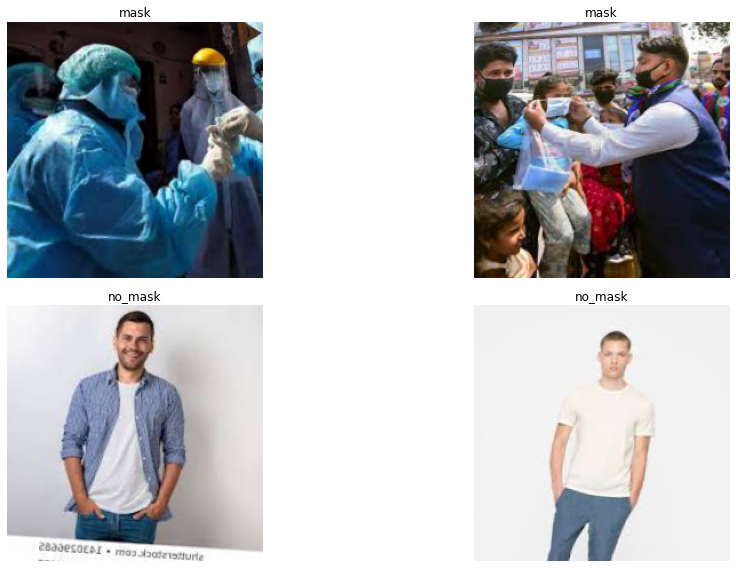

In [ ]:
data.show_batch(rows=2, figsize=(16,8))

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fit_one_cycle(10) 

epoch,train_loss,valid_loss,error_rate,time
0,1.305053,0.878126,0.350000,00:05
1,1.044647,1.382470,0.250000,00:02
2,0.847520,2.099267,0.250000,00:02
3,0.659116,1.447597,0.200000,00:02
4,0.522061,0.888062,0.150000,00:02
5,0.434526,0.641548,0.100000,00:02
6,0.369162,0.511817,0.100000,00:02
7,0.320316,0.379212,0.100000,00:02
8,0.283052,0.297847,0.100000,00:02
9,0.258877,0.235053,0.100000,00:02


In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze() #Train weights at all the layers of the network

In [ ]:
learn.lr_find(start_lr=1e-07, end_lr=1e-01) #We can either manually supply start and end learning rate or it will take values between 1e-07 to 1e01 by default

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


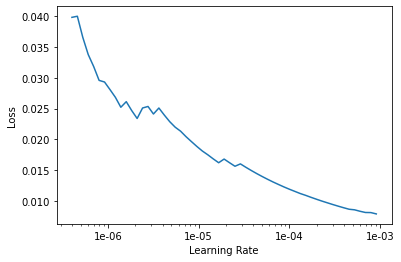

In [ ]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(20, max_lr=slice(1e-5,1e-03)) #The idea of decreasing the learning rate as you train is called learning rate annealing

epoch,train_loss,valid_loss,error_rate,time
0,0.000204,0.599512,0.150000,00:02
1,0.009530,0.398197,0.150000,00:02
2,0.037971,0.214052,0.100000,00:02
3,0.028205,0.107145,0.050000,00:02
4,0.022336,0.054009,0.050000,00:02
5,0.025748,0.062125,0.050000,00:02
6,0.021846,0.072677,0.050000,00:02
7,0.018938,0.079797,0.050000,00:02
8,0.018383,0.021207,0.000000,00:02
9,0.023348,0.003432,0.000000,00:02


In [ ]:
learn.save('stage-2')

### Step 8. Interpret the result

In [ ]:
learn.load('stage-2');

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

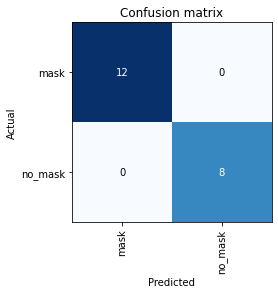

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
from fastai.widgets import *

In [ ]:
from fastai.widgets import ClassConfusion

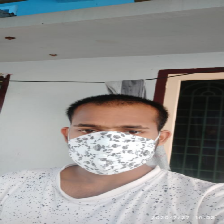

In [ ]:
path=Path('RWDS/assignment1/test')
img = open_image(path/'mask.jpg')
img.resize(torch.Size([img.shape[0],224,224]))

In [ ]:
learn.export()
path=Path('RWDS/assignment1')

learn = load_learner(path)

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'mask'

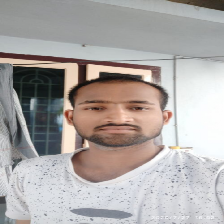

In [ ]:
path=Path('RWDS/assignment1/test')
img2 = open_image(path/'no_mask.jpg')
img2.resize(torch.Size([img.shape[0],224,224]))

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img2)
pred_class.obj

'no_mask'